[Ref.] https://databricks.com/wp-content/uploads/2019/10/Introduction-to-Neural-Networks-MLflow-and-SHAP.html

해보니 SHAP의 경우 Tensorflow 2.x 에서는 잘 안돌아가는 듯 함(21.11.22)
<BR>

해당 문서는 Tensorflow 2.7을 설치하고 SHAP를 돌리는 방향으로 진행함

In [ ]:
!pip3 install shap

In [ ]:
!pip3 install mlflow

In [3]:
import shap

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# Use TensorFlow Backend
import tensorflow as tf

##########################################
tf.compat.v1.disable_v2_behavior()
##########################################

# tf.set_random_seed(42) # For reproducibility
tf.random.set_seed(42) # For reproducibility

# config = tf.ConfigProto()
config = tf.compat.v1.ConfigProto() 

config.gpu_options.visible_device_list = "0"
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.5
# tf.Session(config=config)
tf.compat.v1.Session(config=config)

# Print out Keras version
print(keras.__version__)

2.7.0


In [8]:
# Configure MLflow Experiment
#mlflow_experiment_id = 2102416

# Including MLflow
import mlflow
import mlflow.keras
import os
print("MLflow Version: %s" % mlflow.__version__)

MLflow Version: 1.21.0


In [9]:
from keras.utils import np_utils

In [10]:
# -----------------------------------------------------------
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 12


# -----------------------------------------------------------
# Image Datasets

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
# One-Hot Vector for y_train = 25168 representing the number 9 
#  The nth-digit will be represented as a vector which is 1 in the nth dimensions. 
y_train[25168,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
from __future__ import print_function

# This is the extracted array for x_train = 25168 from the training matrix
xt_25168 = x_train[25168,:]

print(xt_25168)

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [13]:
# As this is a 28 x 28 image, let's print it out this way
txt = ""
for i in range (0, 27):
   for j in range(0, 27):
      val = "%.3f" % xt_25168[i,j]
      txt += str(val).replace("[", "").replace("]", "") + ", "
   
   print(txt)
   txt = ""

0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0

In [15]:
# Check for any available GPUs
# K.tensorflow_backend._get_available_gpus()
# tf.compat.v1.keras.backend.get_available_gpus()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17786333091801506196
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5998477312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17124870623517724089
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [20]:
def runCNN(activation, verbose):
  # Building up our CNN
  model = Sequential()
  
  # Convolution Layer
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation=activation,
                 input_shape=input_shape)) 
  
  # Convolution layer
  model.add(Conv2D(64, (3, 3), activation=activation))
  
  # Pooling with stride (2, 2)
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # Delete neuron randomly while training (remain 75%)
  #   Regularization technique to avoid overfitting
  model.add(Dropout(0.25))
  
  # Flatten layer 
  model.add(Flatten())
  
  # Fully connected Layer
  model.add(Dense(128, activation=activation))
  
  # Delete neuron randomly while training (remain 50%) 
  #   Regularization technique to avoid overfitting
  model.add(Dropout(0.5))
  
  # Apply Softmax
  model.add(Dense(num_classes, activation='softmax'))

  # Log MLflow
  #with mlflow.start_run(experiment_id = mlflow_experiment_id) as run:
  with mlflow.start_run() as run:
  
    # Loss function (crossentropy) and Optimizer (Adadelta)
    model.compile(loss=keras.losses.categorical_crossentropy,
            #   optimizer=keras.optimizers.Adadelta(),
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

    # Fit our model
    model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_data=(x_test, y_test))

    # Evaluate our model
    score = model.evaluate(x_test, y_test, verbose=0)

    # Log Parameters
    mlflow.log_param("activation function", activation)
    mlflow.log_metric("test loss", score[0])
    mlflow.log_metric("test accuracy", score[1])
    
    # Log Model
    mlflow.keras.log_model(model, "model")
    
  # Return
  return score

In [21]:
score_sigmoid = runCNN('sigmoid', 0)
print('Test loss:', score_sigmoid[0])
print('Test accuracy:', score_sigmoid[1])

2021/11/23 05:13:46 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.1.74+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.1.74' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Test loss: 2.300959464263916
Test accuracy: 0.1135


In [37]:
score_tanh = runCNN('tanh', 0)
print('Test loss:', score_tanh[0])
print('Test accuracy:', score_tanh[1])

2021/11/23 05:32:51 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.1.74+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.1.74' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Test loss: 0.5534676252365113
Test accuracy: 0.8697


In [23]:
# Building up our CNN
model = Sequential()

# Convolution Layer
model.add(Conv2D(32, kernel_size=(3, 3),
               activation='relu',
               input_shape=input_shape)) 

# Convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Pooling with stride (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Delete neuron randomly while training (remain 75%)
#   Regularization technique to avoid overfitting
model.add(Dropout(0.25))

# Flatten layer 
model.add(Flatten())

# Fully connected Layer
model.add(Dense(128, activation='relu'))

# Delete neuron randomly while training (remain 50%) 
#   Regularization technique to avoid overfitting
model.add(Dropout(0.5))

# Apply Softmax
model.add(Dense(num_classes, activation='softmax'))

# Log MLflow
#with mlflow.start_run(experiment_id = mlflow_experiment_id) as run:
with mlflow.start_run() as run:

  # Loss function (crossentropy) and Optimizer (Adadelta)
  model.compile(loss=keras.losses.categorical_crossentropy,
            # optimizer=keras.optimizers.Adadelta(),
            optimizer=tf.keras.optimizers.Adadelta(),
            metrics=['accuracy'])

  # Fit our model
  model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test, y_test))

  # Evaluate our model
  score = model.evaluate(x_test, y_test, verbose=0)

  # Log Parameters
  mlflow.log_param("activation function", 'relu')
  mlflow.log_metric("test loss", score[0])
  mlflow.log_metric("test accuracy", score[1])

  # Log Model
  mlflow.keras.log_model(model, "model")

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 131us/sample - loss: 2.2855 - acc: 0.1440 - val_loss: 2.2584 - val_acc: 0.2397
Epoch 2/12
60000/60000 [==============================] - 7s 124us/sample - loss: 2.2401 - acc: 0.2274 - val_loss: 2.2015 - val_acc: 0.3280
Epoch 3/12
60000/60000 [==============================] - 7s 124us/sample - loss: 2.1800 - acc: 0.3108 - val_loss: 2.1247 - val_acc: 0.4501
Epoch 4/12
60000/60000 [==============================] - 7s 124us/sample - loss: 2.0985 - acc: 0.3882 - val_loss: 2.0204 - val_acc: 0.5699
Epoch 5/12
60000/60000 [==============================] - 7s 124us/sample - loss: 1.9899 - acc: 0.4620 - val_loss: 1.8826 - val_acc: 0.6495
Epoch 6/12
60000/60000 [==============================] - 7s 124us/sample - loss: 1.8507 - acc: 0.5282 - val_loss: 1.7084 - val_acc: 0.7037
Epoch 7/12
60000/60000 [==============================] - 7s 124us/sample - loss: 1.6914 - acc: 0.5694 - val_l

2021/11/23 05:17:07 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.1.74+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). MLflow logged a pip requirement for this package as 'jaxlib==0.1.74' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


In [24]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7651742231369019
Test accuracy: 0.8449


In [41]:
# tf.compat.v1.disable_eager_execution()

# import tensorflow as tf
# tf.enable_eager_execution()

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# tf.enable_eager_execution()

# tf.compat.v1.disable_eager_execution()

# tf.disable_v2_behavior()
# tf.compat.v1.disable_v2_behavior()

In [30]:
#import shap
# import numpy as np

In [38]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

In [45]:
shap_values = e.shap_values(x_test[1:10])

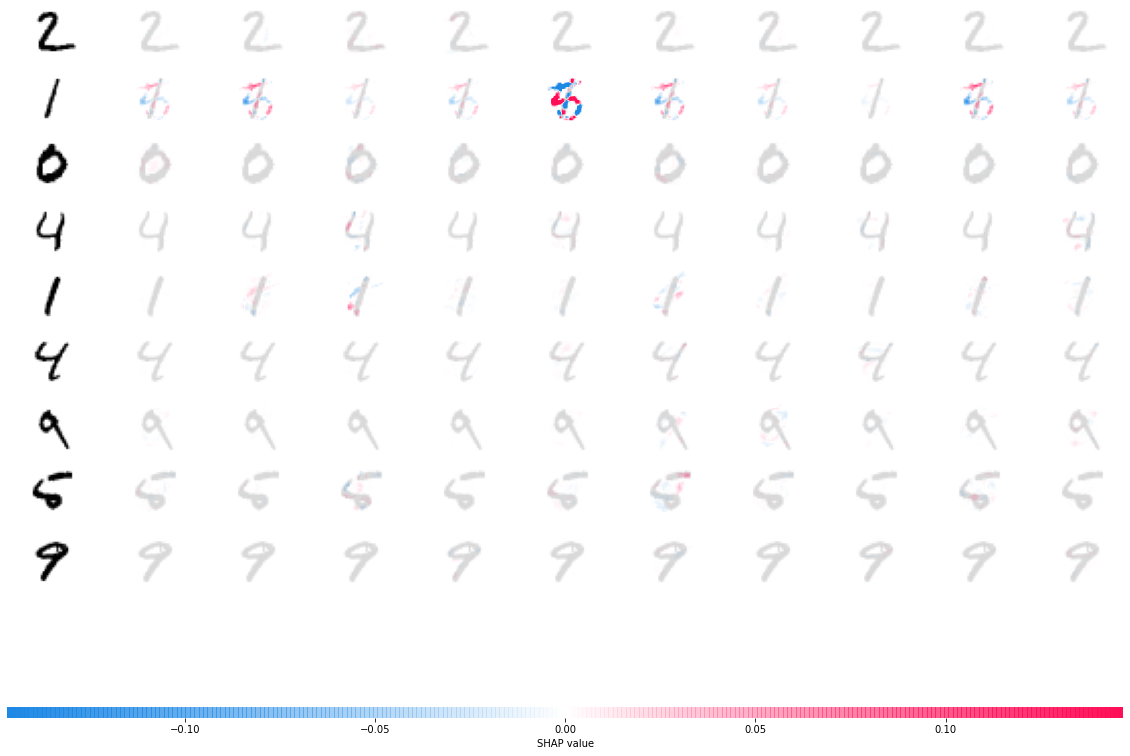

None

In [46]:
# plot the feature attributions
shap_plot = shap.image_plot(shap_values, -x_test[1:10])
# shap_plot = shap.image_plot(shap_values, x_test)
display(shap_plot)

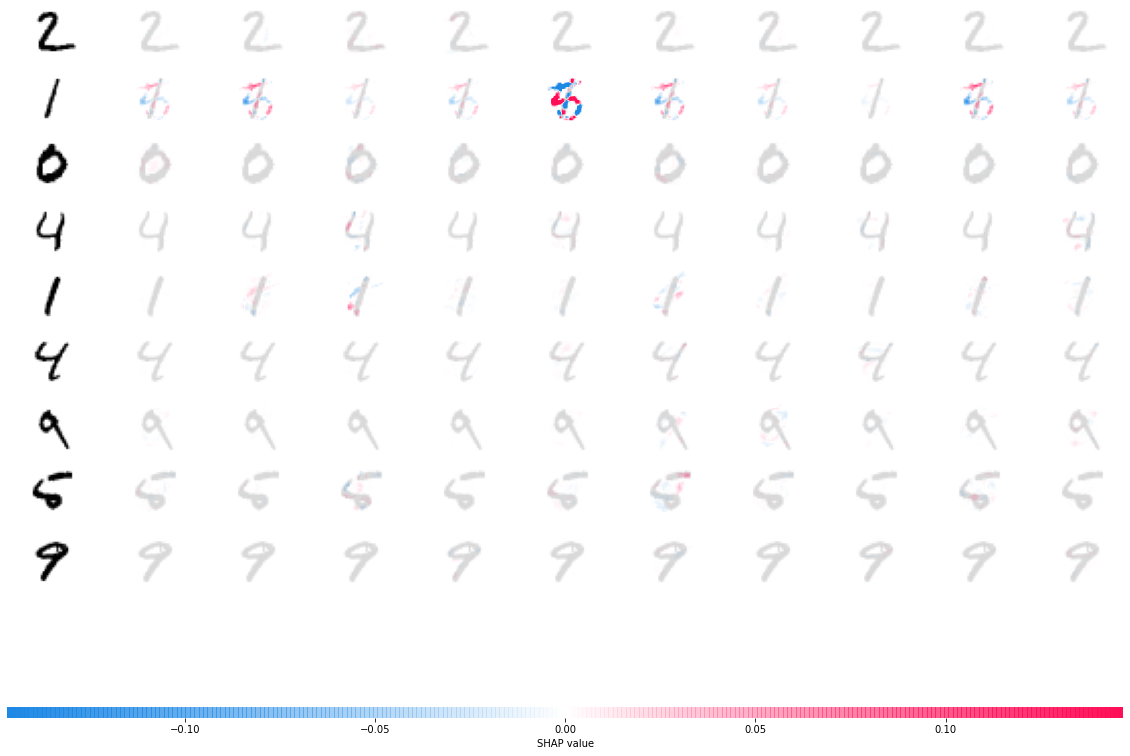

None

In [47]:
# plot the feature attributions
shap_plot = shap.image_plot(shap_values, -x_test[1:10])
display(shap_plot)

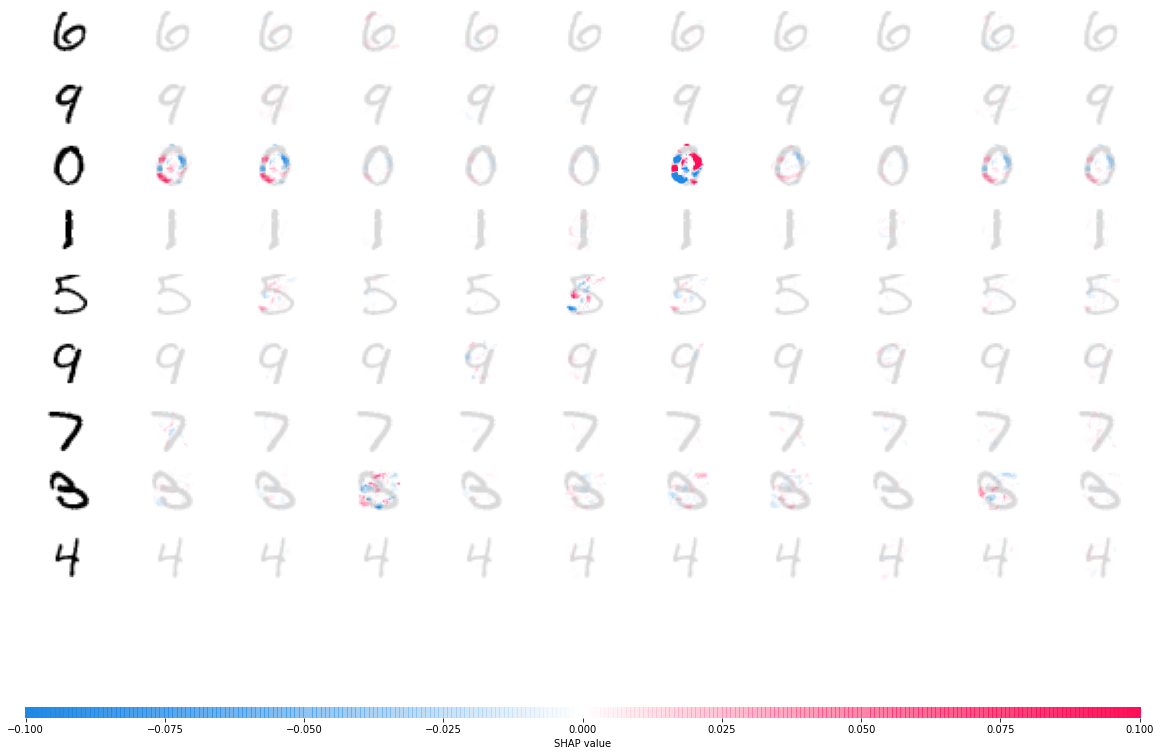

None

In [36]:
# plot the feature attributions
shap_plot = shap.image_plot(shap_values, -x_test[11:20])
display(shap_plot)